<a href="https://colab.research.google.com/github/MatheusABomfim/ML_HTLV_HAM-TSP/blob/main/ML_MEST_HTLV%2BMBL2%2BCLINICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes/reminders:

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* This script is based on the file: "Based on the ML Wine data set" with the appropriate modifications.

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

# Dictionary:
* In column: MBL-550
  * HH = 0
  * HL = 1
  * LL = 2
  
* In column: MBL-221
  * YY = 0
  * YX = 1
  * xx = 2

* In column: MBL EXON
  * AO = 0
  * AA = 1
  * OO = 2

* In column: SEX
  * M = 0
  * F = 1

* In column: HAM/TSP
 * No myelopathy = 0
 * HAM/TSP = 1

In [ ]:
# Att Scikit-learn
!pip uninstall scikit-learn
!pip install scikit-learn

# Install shap package (não consta no google colab)
!pip install shap #Corrigir erro do shap

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
#import shap

dados_iniciais_Vanessa = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML.csv')

#Ignoring flags
import warnings
warnings.filterwarnings('ignore')

# Importing and processing data:

In [ ]:
# Import Data Frame
# Import initial file "dados_iniciais_Vanessa"
df = pd.read_table(dados_iniciais_Vanessa, sep=',')  # sep= parâmetro separador(;)
nome_arquivo = os.path.basename(dados_iniciais_Vanessa).split(".")  # obtem o nome do arquivo = os.path.basename(arquivo) e split obtém o nome em partes separadas por ponto
nome_arquivo = nome_arquivo[0]  # obtem o nome do arquivo sem a extensão
caminho_arquivo = os.path.dirname(dados_iniciais_Vanessa) #obtem o caminho do arquivo, sem o nome dele (arquivo)

In [ ]:
# Evaluation of successful dataframe import
#print(df)
#df.dtypes
#df.head
print(df.columns)

Index(['NUM AMO', 'NOME', 'REGISTRO', 'SEXO', 'Idade 2018 (2019 AZUL)',
       'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'SINTOMAS',
       'ANO DE DIAGNOSTICO', 'SINT. DET.', 'Incontinência Urinária',
       'dor urinária', 'parestesia', 'Paresia', 'Hipereflexia',
       'Hipereflexia em MMII', 'Hiperatividade', 'fraqueza',
       'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência', 'Dor',
       'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose

**Creating a storage directory**

In [ ]:
# Checking the directory
diretorio_name = caminho_arquivo + "/" + nome_arquivo  # cria o diretório a partir das variáveis acima de caminho e nome_arquivo
try:
    os.mkdir(diretorio_name)  # tenta criar o diretório
    print("Novo Diretório Criado! \n")
except FileExistsError:
    print("O diretório já existe!")
    print(diretorio_name)
    print("--> Verifique se ele está vazio, ou possui arquivos! \n")

# Dataframe format (rows, columns)
print('Dados carregados! \nO seu dado apresenta o seguinte quantitativo de (linhas, colunas):', df.shape)

O diretório já existe!
/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML
--> Verifique se ele está vazio, ou possui arquivos! 

Dados carregados! 
O seu dado apresenta o seguinte quantitativo de (linhas, colunas): (155, 68)


In [ ]:
# Transformation of categorical nominal data into categorical numerical data:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Elimination of data that is cloudy:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Delete columns that will not be used:
df = df.drop('SINTOMAS', axis=1)
df = df.drop('SINT. DET.', axis=1)
df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('NOME', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)

# Transforming string data into float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Removal of rows with null values:
df = df.dropna()

In [ ]:
df.columns

Index(['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221',
       'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade 

In [ ]:
# Data division
# Binary categorical data
cat_bin = ['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade de urinar',
       'Fraqueza ', 'Hipotireodismo', 'Descontrole urinário',
       'Síndrome piramidal', 'Dermatite', 'Sífilis', 'Infecções recorrentes']

# Multiple categorical data
cat_mult= ['SINTOMAS', 'MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

**Exploratory analysis**




Cleaning null data

In [ ]:
#print(df)
#df.shape
#df.columns
df = df.loc[:, ~df.columns.isin(['Baixo fluxo urinário', 'Câimbras', 'Edema MMSS'])]

Analysis of mean, variance, standard deviation, skewness, kurtosis and maximum and minimum values per column

In [ ]:
# Calculation of appraised values
mean = df.mean()
var = df.var()
skewness = df.apply(skew)
kurt = df.apply(kurtosis)

# Printing results
with open('Exploratory_Analysis.txt', 'w') as arquivo:
  for i in range(len(df.columns)):
    coluna = df.columns[i]
    print(f'Coluna: {coluna}', file=arquivo)
    print('Média:', df.iloc[:, i].mean(), file=arquivo)
    print('Variância:', df.iloc[:, i].var(), file=arquivo)
    print('Desvio Padrão:', df.iloc[:, i].std(), file=arquivo)
    print('Assimetria:', skew(df.iloc[:, i]), file=arquivo)
    print('Curtose:', kurtosis(df.iloc[:, i]), file=arquivo)
    print('Val. Min:', df.iloc[:, i].min(), file=arquivo)
    print('Val. Max:', df.iloc[:, i].max(), file=arquivo)
    print(file=arquivo)

# Organizing the results and sending them to the drive

caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Exploratory_Analysis.txt'
if os.path.exists(caminho_arquivo):
    os.remove(caminho_arquivo)
    print('Old file successfully removed.')

destino = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'
shutil.move('Exploratory_Analysis.txt', destino)
print('File moved to destination directory.')


File moved to destination directory.


Target frequency distribution (HAM/TSP)

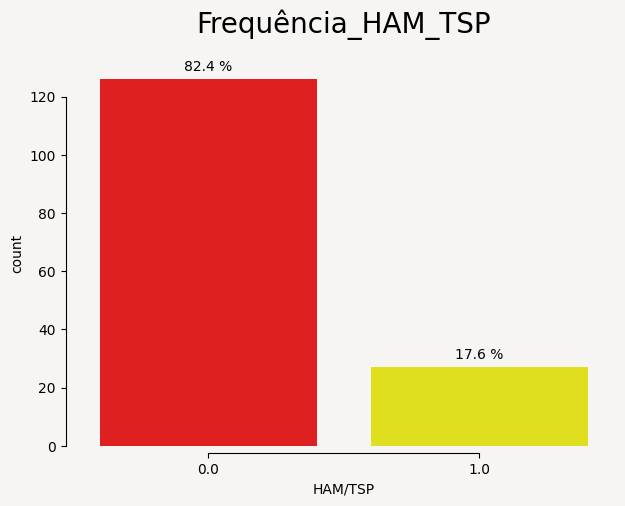

In [ ]:
# Color palette
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Frequência_HAM_TSP', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_sem_dados_clínicos/' + 'Frequência_HAM_TSP.pdf')

Pearson correlation matrix (heatmap):

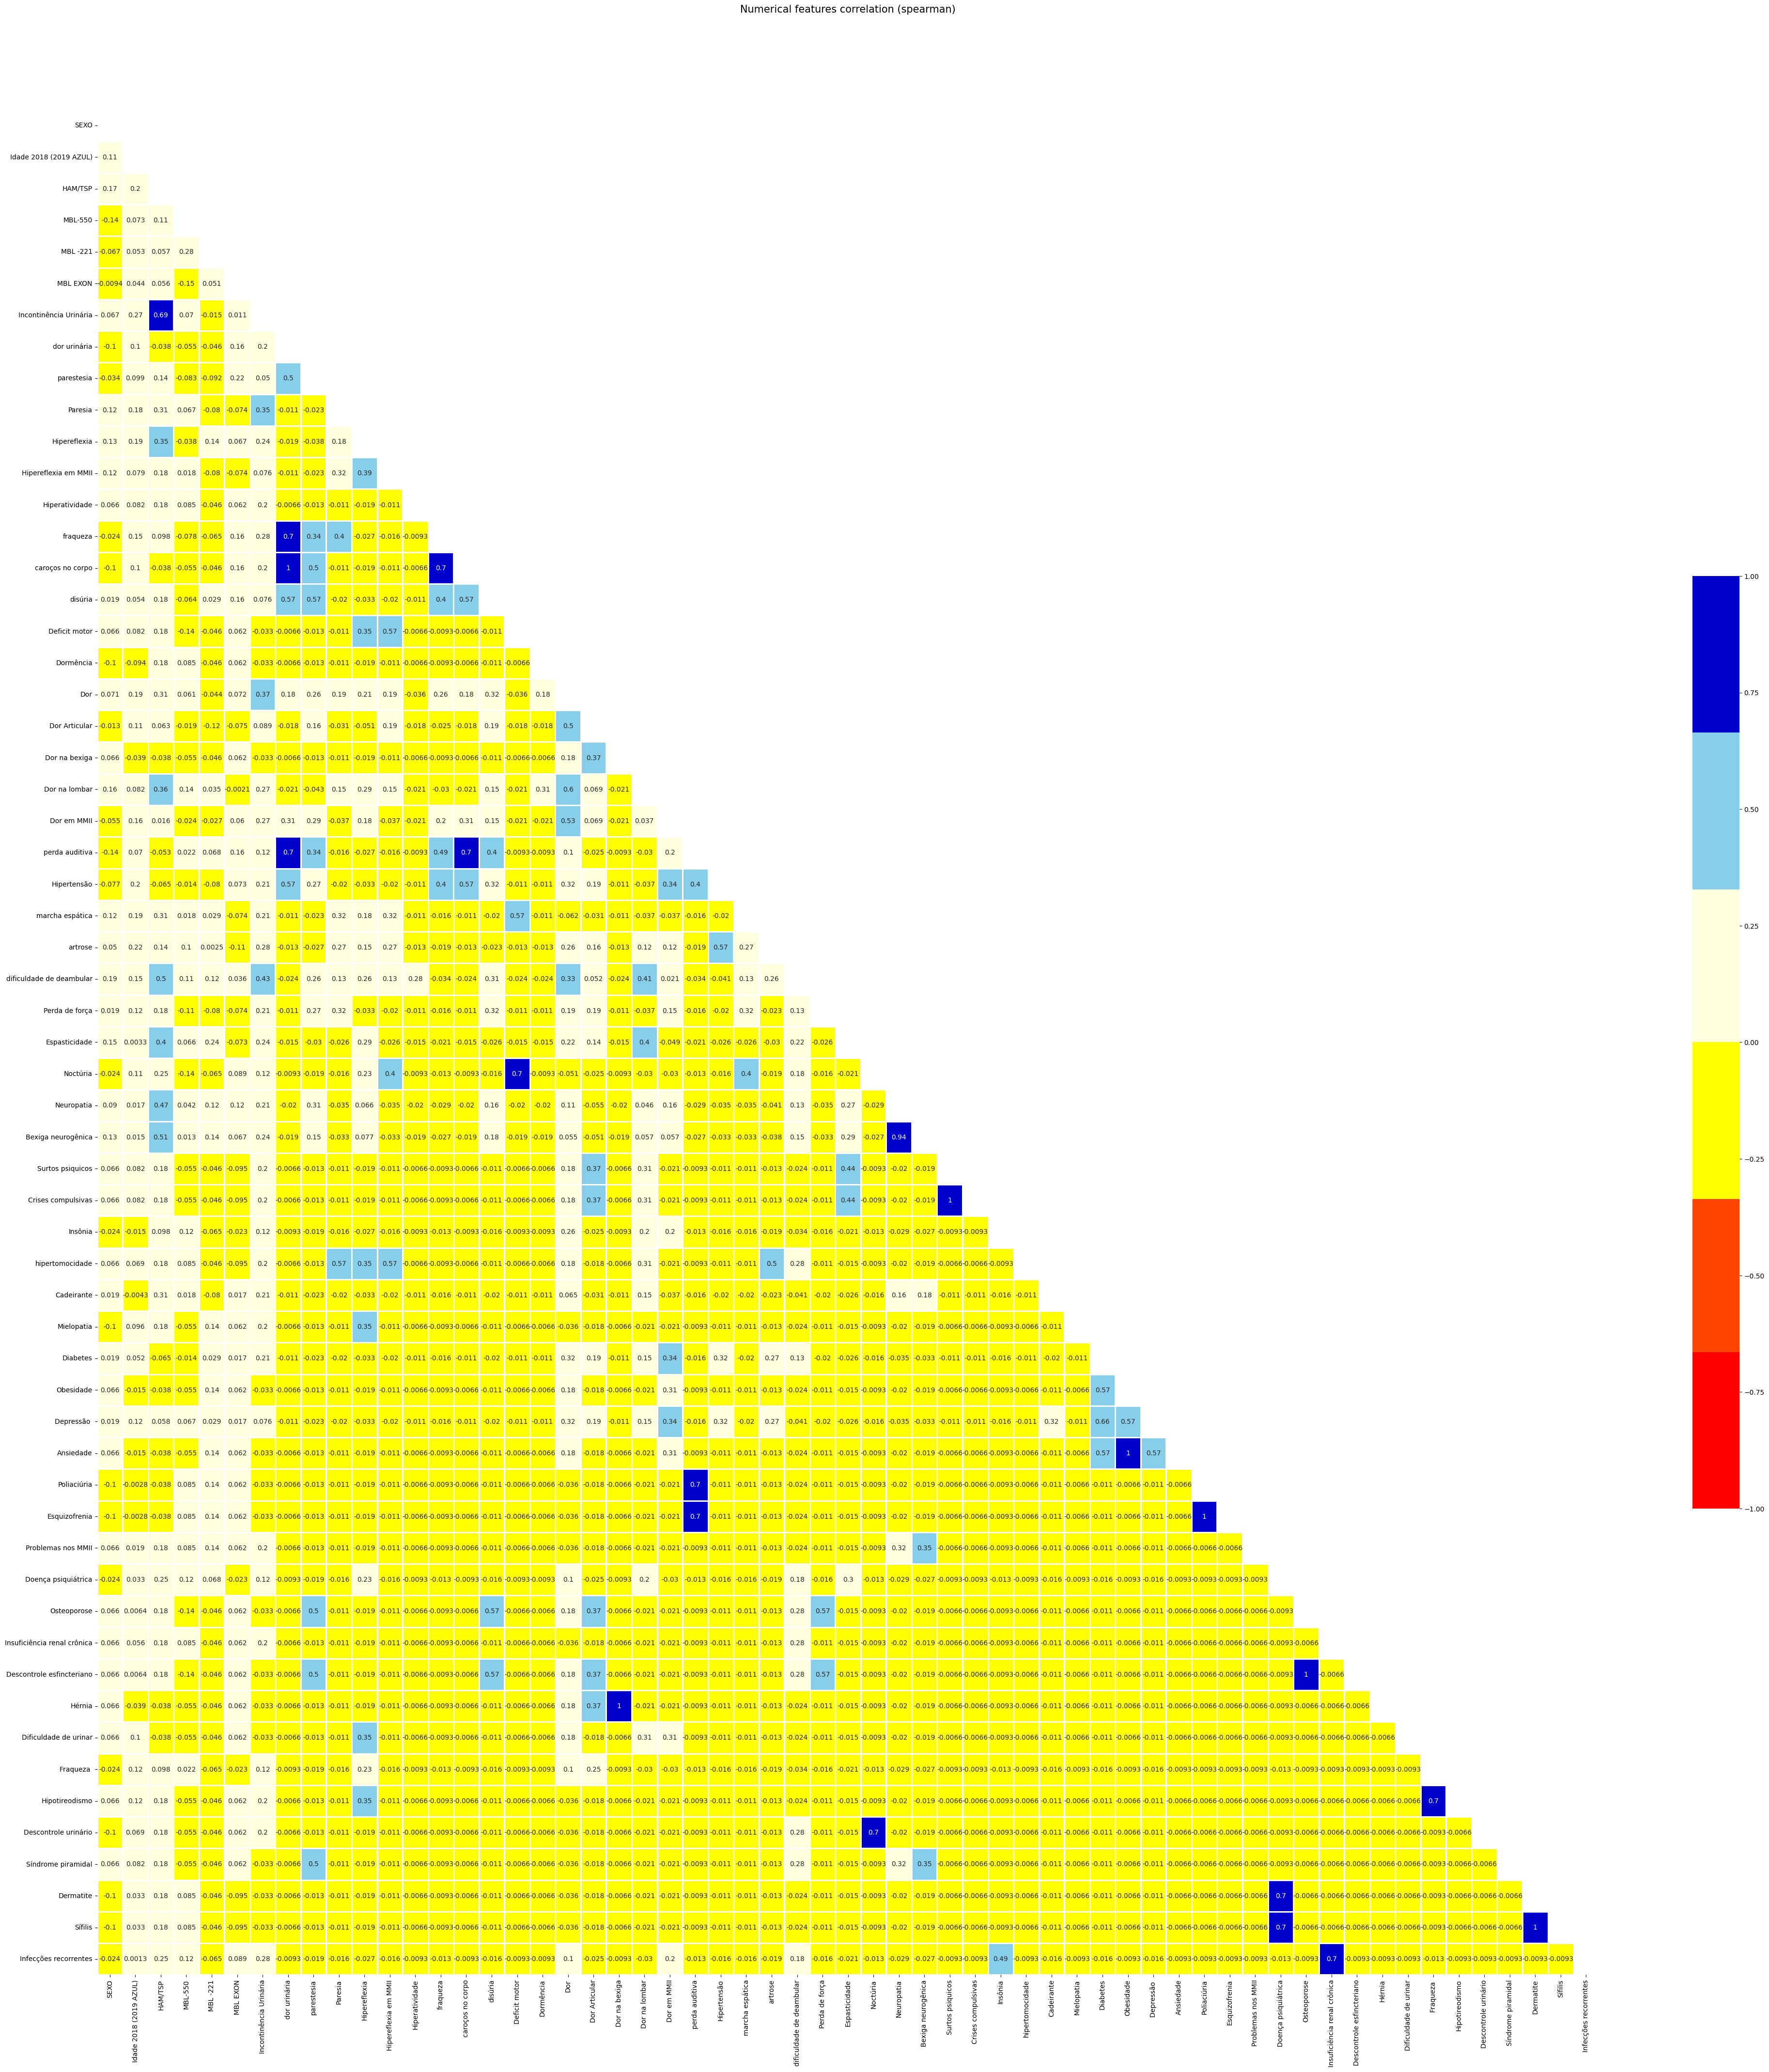

In [ ]:
# Correlation
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']
metodo_correlacao = "spearman"
df_ = df
corr = df_.corr(method= metodo_correlacao) #method : {'pearson', 'kendall', 'spearman'}
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5})
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=15, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'plot_heatmap_corr_pearson.pdf')

plt.show()

Cleaning non-numerical data with no predictive value for ML

In [ ]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

#**Cross-validation + ROC Curve + Mean AUC**


In [ ]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# Name two ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Creating the model
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100) #lista das médias

    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metricas
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        item.fit(x_train, y_train)
        y_proba = item.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"ROC fold {fold} (AUC = {roc_auc:.2f})")
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 std. dev.')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Mean ROC curve with variability ' + nome)
    plt.legend(loc="lower right")
    plt.show()
    # plota txt

# Data prevision randomly:


In [ ]:
# Data prevision randomly:
previsoes = item.predict(x_teste[40:45])
previsoes_formatada = ', '.join(str(valor) for valor in previsoes) # concatena lista e converte valores em strings, apresentados separados por ",";
previsoes_formatada = ["Sem mielopatia" if valor == 0 else "HAM/TSP" for valor in previsoes]


print(f"O valor indicado pelo modelo corresponde há: \n{previsoes_formatada} \n")

# Template:
y_teste_lista = y_teste[40:45]
y_teste_lista = ["HAM/TSP" if valor == 1 else "Sem mielopatia" for valor in previsoes]
print(f"O valor real (gabarito), corresponde há:\n{y_teste_lista}")


Identificar quais variáveis mais contribuem para o modelo

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(DecisionTreeClassifier, random_state=seed).fit(x_treino, y_treino)

w = eli5.show_weights(perm_imp, feature_names=x_teste.columns.tolist())


result = pd.read_html(w.data)[0]

arquivo_gerado = diretorio_name+"/"+nome_arquivo+"_Importancia_Variaveis.csv"
result.to_csv(arquivo_gerado)

result

In [ ]:
from sklearn.inspection import permutation_importance
pi = permutation_importance(item, x_treino, y_treino,
                           n_repeats=30,
                           random_state=0)
for i in pi.importances_mean.argsort()[::-1]:
    if pi.importances_mean[i] - 2 * pi.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

NameError: name 'diabetes' is not defined